In [19]:
# make the current working directory the project root directory
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [20]:
import numpy as np
import pandas as pd
from stable_baselines3.common.env_checker import check_env

from environments.discrete_env import DiscretePortfolioEnv

In [21]:
returns_df = pd.read_csv('data/returns_toy_dataset.csv', parse_dates=['Date'])
returns_df.head()

,Date,AAPL,GOOGL,MSFT
0,2022-01-04,-0.012692,-0.004083,-0.017147
1,2022-01-05,-0.026600,-0.045876,-0.038388
2,2022-01-06,-0.016693,-0.000200,-0.007902
3,2022-01-07,0.000988,-0.005303,0.000510
4,2022-01-10,0.000116,0.012061,0.000732


`returns_df` must have a **numerical index**, a **`Date` column** as the first column, and a **column for each asset**. Each entry is the return of an asset on a particular day. For example, if I had `$1` of AAPL stocks on `2022-01-03`, I would lose `-$0.012692` on `2022-01-04`.

In [22]:
# check environment with SB3
env_train = DiscretePortfolioEnv(returns_df, episode_length=90)
check_env(env_train)

env_test = DiscretePortfolioEnv(returns_df, episode_length=-1)
check_env(env_test)

Episode Length: 90


,Date,AAPL,GOOGL,MSFT,AAPL_ALLOCATION,GOOGL_ALLOCATION,MSFT_ALLOCATION,BALANCE
20,2022-02-02,0.007044,0.075238,0.015222,0.0,0.0,0.0,1000.000000
21,2022-02-03,-0.016720,-0.033176,-0.038952,0.0,0.1,0.0,996.682430
22,2022-02-04,-0.001679,0.001419,0.015568,0.0,0.1,0.1,998.375503
23,2022-02-07,-0.004235,-0.028557,-0.016310,0.0,0.2,0.1,991.045030
24,2022-02-08,0.018467,0.001422,0.011995,0.0,0.1,0.1,992.374783
...,...,...,...,...,...,...,...,...
106,2022-06-07,0.017586,0.002816,0.013954,0.3,0.4,0.2,932.053684
107,2022-06-08,-0.005043,0.000380,-0.007670,0.3,0.5,0.2,929.390771
108,2022-06-09,-0.035956,-0.020125,-0.020783,0.3,0.4,0.2,908.021094
109,2022-06-10,-0.038629,-0.031994,-0.044564,0.3,0.4,0.3,873.738600


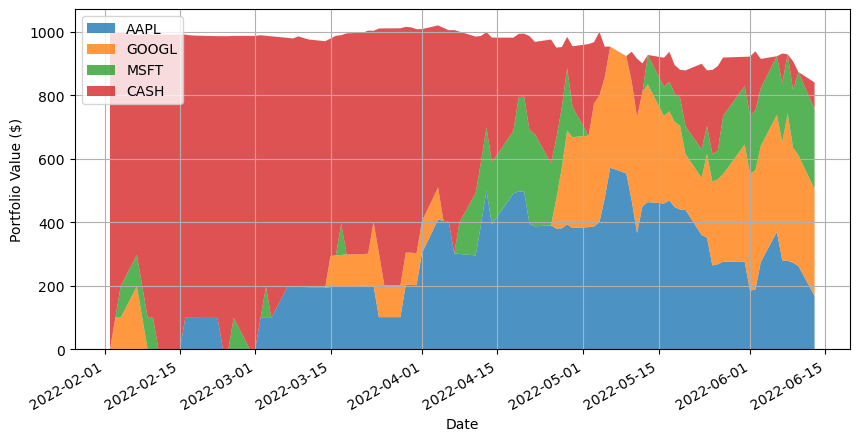

In [23]:
# training mode
np.random.seed(0)
env = DiscretePortfolioEnv(returns_df, episode_length=90)

obs = env.reset()
done = False
while not done:
    action = np.random.randint(env.action_space.n)
    obs, reward, done, info = env.step(action)

df = env.df[env.df[env.BALANCE].isna() == False]
print('Episode Length:', len(df)-1)
display(df)
env.render()
env.close()

Episode Length: 235


,Date,AAPL,GOOGL,MSFT,AAPL_ALLOCATION,GOOGL_ALLOCATION,MSFT_ALLOCATION,BALANCE
14,2022-01-25,-0.011385,-0.029579,-0.026588,0.0,0.0,0.0,1000.000000
15,2022-01-26,-0.000563,0.018104,0.028493,0.1,0.0,0.0,999.943665
16,2022-01-27,-0.002943,-0.001764,0.010549,0.1,0.1,0.0,999.472953
17,2022-01-28,0.069778,0.033689,0.028082,0.1,0.1,0.0,1009.814123
18,2022-01-31,0.026126,0.014642,0.008824,0.1,0.1,0.0,1013.930886
...,...,...,...,...,...,...,...,...
245,2022-12-23,-0.002798,0.016750,0.002267,0.6,0.3,0.0,886.730375
246,2022-12-27,-0.013878,-0.020621,-0.007414,0.6,0.2,0.0,875.689525
247,2022-12-28,-0.030685,-0.015677,-0.010255,0.5,0.2,0.0,859.508543
248,2022-12-29,0.028324,0.028249,0.027630,0.5,0.2,0.0,876.537152


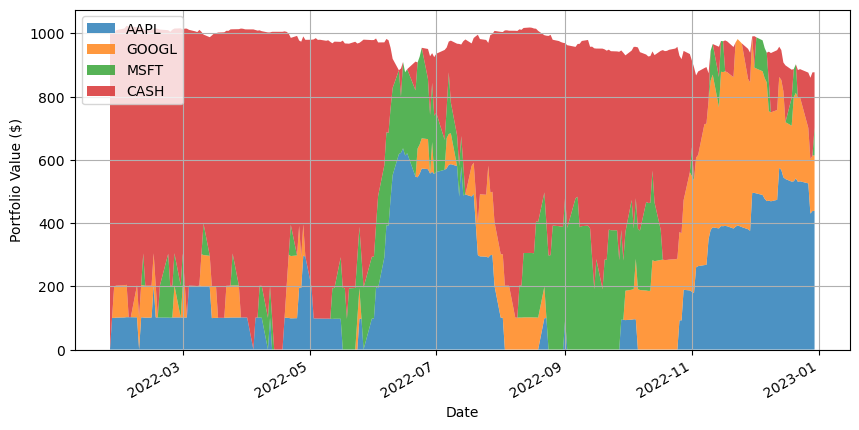

In [24]:
# testing mode
np.random.seed(0)
env = DiscretePortfolioEnv(returns_df, episode_length=-1)

obs = env.reset()
done = False
while not done:
    action = np.random.randint(env.action_space.n)
    obs, reward, done, info = env.step(action)

df = env.df[env.df[env.BALANCE].isna() == False]
print('Episode Length:', len(df)-1)
display(df)
env.render()